In [1]:
# importing all the required modules
import pandas as pd
import os
import numpy as np

In [2]:
# joining all the csv files together and making it into one
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')]
allmonths = pd.DataFrame()
for file in files:
    current_data = pd.read_csv(path+"/"+file)
    allmonths = pd.concat([allmonths, current_data])
    
allmonths.to_csv('all_data_copy.csv', index=False)

In [3]:
all_data = pd.read_csv('all_data_copy.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
# dropping the na values
all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [5]:
# creating a month column 
all_data = all_data[all_data['Order Date'].str[0:2]!= 'Or']
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [6]:
# creating a total sale coumn for each product and qualtity
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int')
all_data['Price Each'] = all_data['Price Each'].astype('float')
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


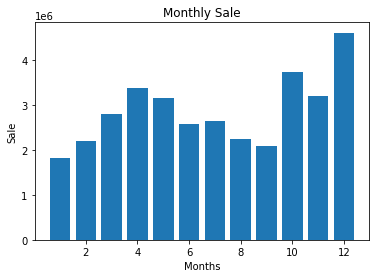

In [7]:
# grouping by month to view sales for every month
month_data = all_data.groupby('Month')
month_sale=[]
for m in np.arange(1,13):
    allmonth = month_data.get_group(m)['Sales'].sum()
    month_sale.append(allmonth)
x = np.arange(1,13)
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(x, month_sale)
plt.title('Monthly Sale')
plt.xlabel('Months')
plt.ylabel('Sale')
plt.show()

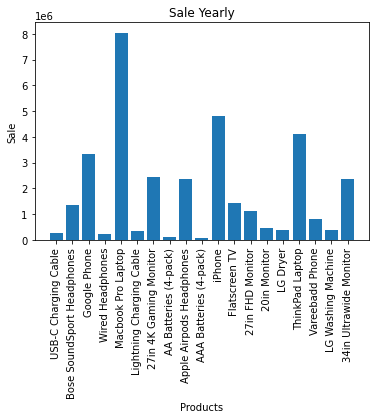

In [8]:
# to view sale by each product
products = all_data['Product'].unique()
len_product= len(products)
product_group = all_data.groupby('Product')
product_sale=[]
for p in products:
    product_sum = product_group.get_group(p)['Sales'].sum()
    product_sale.append(product_sum)

plt.xticks(rotation=90)
plt.bar(products, product_sale)
plt.title('Sale Yearly')
plt.xlabel('Products')
plt.ylabel('Sale')
plt.show()

In [9]:
# creating a city column form purchase address
c1 = all_data['City'] = all_data['Purchase Address'].str.split(',').str[1]
c2= all_data['City'] = all_data['Purchase Address'].str.split(',').str[2].str[0:3]
all_data['City']= c1+c2
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


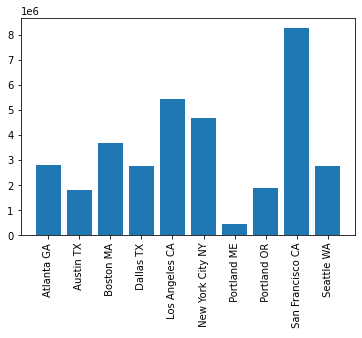

In [10]:
# grouping by city to view sale in every city
city_sale = all_data.groupby('City').sum()

city1= all_data['City'].unique()
city1.sort()
city1
plt.xticks(rotation=90)
plt.bar(city1,city_sale['Sales'])
plt.show()


In [11]:
# creating hour and minute column by parsing orderdate column to view which time had maximum sale
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

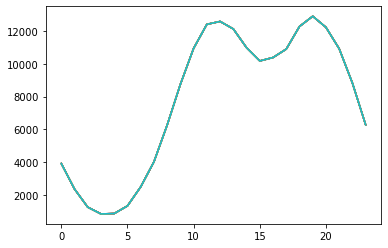

In [12]:
all_data.groupby('Hour').count()
hours = [hour for hour, df in all_data.groupby(['Hour'])]
y= all_data.groupby(['Hour']).count()
plt.plot(hours,y)
plt.plot

In [19]:
data2 = all_data[['City', 'Hour', 'Sales']]
data2 = data2.sort_values('Hour')
data2['City'] = data2['City'].str.strip()
data2

,City,Hour,Sales
186849,San Francisco CA,0,11.95
135202,San Francisco CA,0,3.84
135225,San Francisco CA,0,11.95
135231,Boston MA,0,11.95
18819,Boston MA,0,11.99
...,...,...,...
99697,Los Angeles CA,23,379.99
143225,New York City NY,23,3.84
168697,San Francisco CA,23,700.00
133063,San Francisco CA,23,5.98


In [31]:
city_group = data2.groupby('City')

In [32]:
citynames = data2['City'].unique()
citynames

array(['San Francisco CA', 'Boston MA', 'Los Angeles CA', 'Seattle WA',
       'Portland ME', 'Austin TX', 'New York City NY', 'Atlanta GA',
       'Portland OR', 'Dallas TX'], dtype=object)

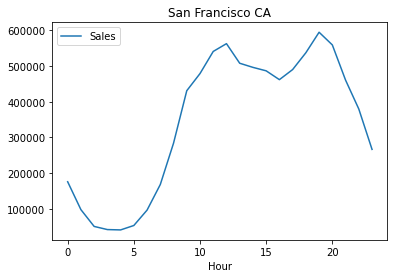

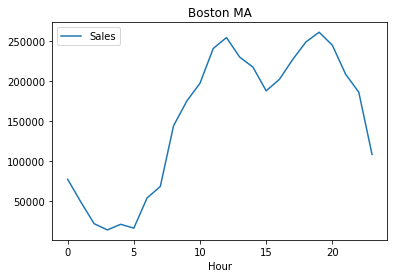

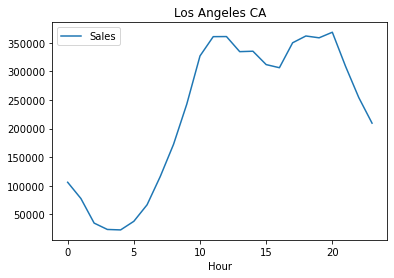

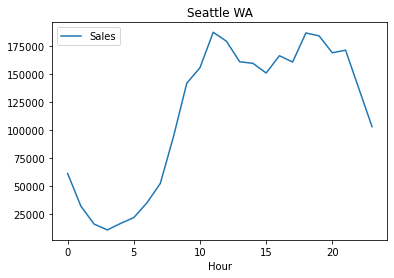

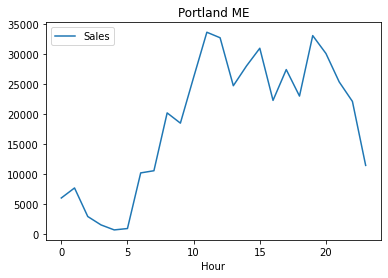

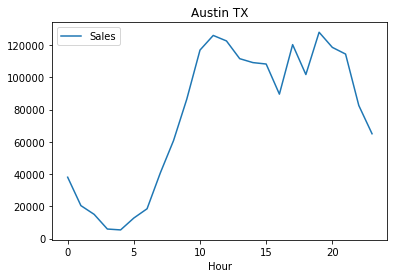

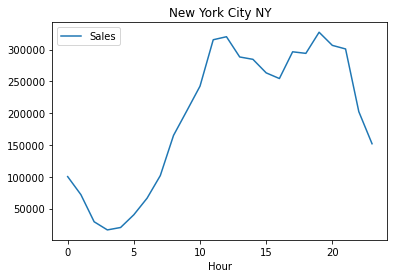

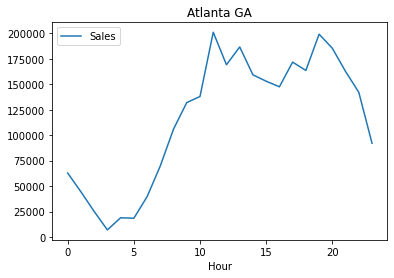

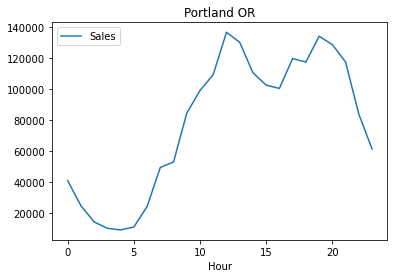

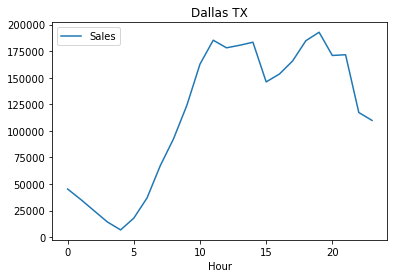

In [40]:
#plotting sales for individual cities
for i in citynames:
    indv_city = city_group.get_group(i)
    hours = indv_city.groupby('Hour').sum()
    hours.plot(title=i)

In [43]:
data3 = all_data[['Product', 'City']]
data3['City'] = data3['City'].str.strip()

<ipython-input-43-5df6a4adcd36>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['City'] = data3['City'].str.strip()


In [46]:
city_product_group = data3.groupby('City')
dallas_product = city_product_group.get_group('Dallas TX')
dallas_product

,Product,City
0,USB-C Charging Cable,Dallas TX
13,27in 4K Gaming Monitor,Dallas TX
14,AA Batteries (4-pack),Dallas TX
22,Apple Airpods Headphones,Dallas TX
43,Apple Airpods Headphones,Dallas TX
...,...,...
186766,27in FHD Monitor,Dallas TX
186775,AAA Batteries (4-pack),Dallas TX
186781,Apple Airpods Headphones,Dallas TX
186782,Apple Airpods Headphones,Dallas TX


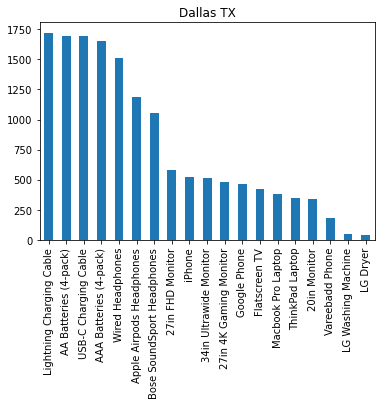

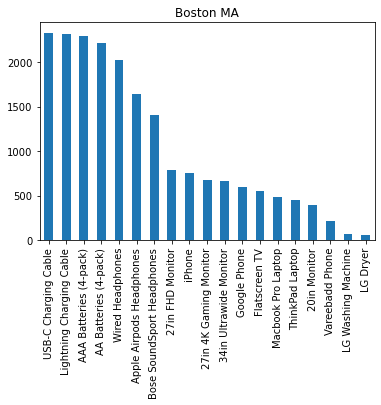

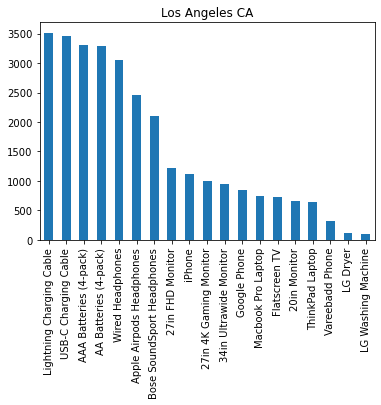

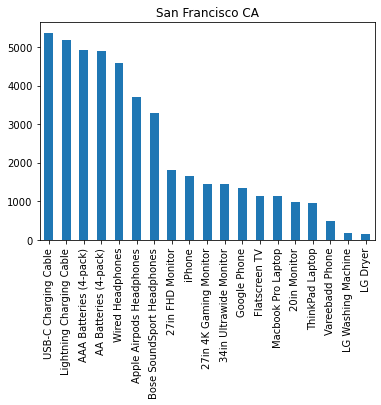

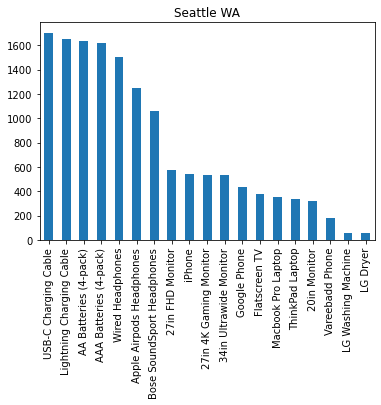

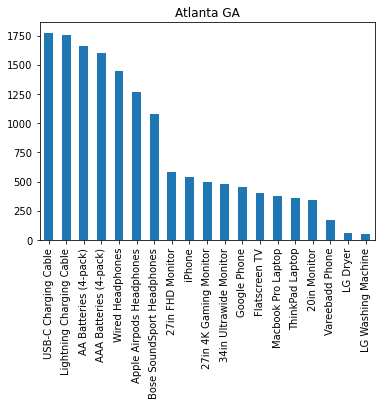

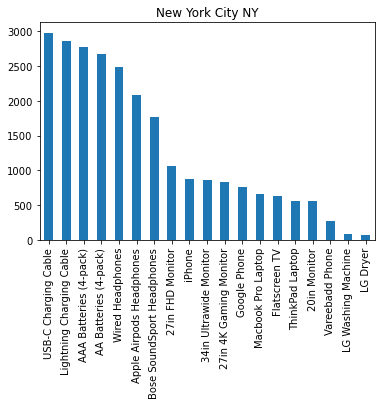

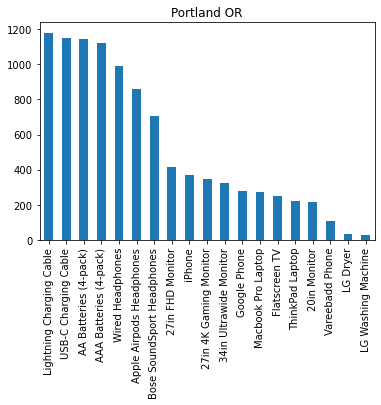

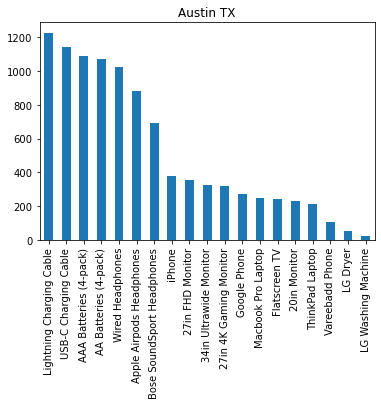

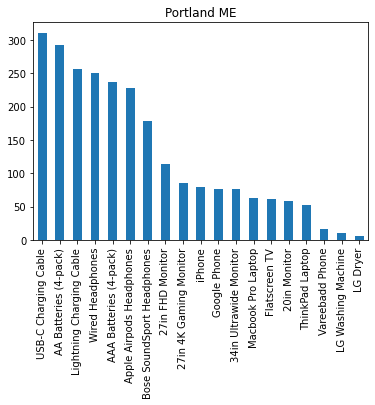

In [71]:
# plotting number of items sale in individual city
city_prod = data3['City'].unique()
city_prod
for i in city_prod:
    city_product_group = data3.groupby('City')
    city_product = city_product_group.get_group(i)
    table = city_product['Product'].value_counts()
    table.plot(kind='bar', rot=90, title=i)
    plt.show()

In [72]:
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27
6,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco CA,13,3
7,176563,Bose SoundSport Headphones,1,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",4,99.99,Seattle WA,7,46
8,176564,USB-C Charging Cable,1,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta GA,10,58
9,176565,Macbook Pro Laptop,1,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",4,1700.00,San Francisco CA,10,38
10,176566,Wired Headphones,1,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",4,11.99,Boston MA,14,5
